In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

import datasets
import utils

In [2]:
dataset = datasets.TDSCTexture()
x, y = dataset[99]
print(x.shape, y)
print(len(dataset))

(20, 20, 3) 1
100


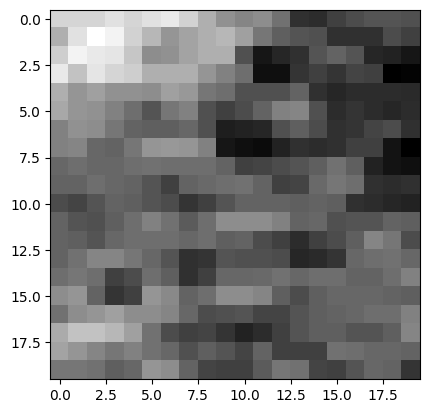

In [3]:
plt.imshow(x[:,:,0], cmap="gray")
plt.show()

In [4]:
distances = [1, 2]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm_dataset = np.zeros((100, 40), dtype=np.float32)

for idx, data in enumerate(dataset):
    x, y = data
    glcm_features = np.zeros((5,8), dtype=np.float32)
    for i in range(3):
        glcm = utils.features.glcm(x[:,:,i], distances=distances, angles=angles)
        cnt = 0
        for feature_name, value in glcm.items():
            value = value.astype(np.float32).flatten()
            glcm_features[cnt] += value
            cnt += 1
    glcm_features = glcm_features.flatten()/3
    glcm_dataset[idx] = glcm_features

print(glcm_dataset)

[[ 57.533337   131.06648     93.177185   ...   0.719143     0.5201475
    0.74693304]
 [ 16.295614    41.454296    30.669298   ...   0.6761821    0.5638431
    0.71009517]
 [ 28.630701    68.84672     47.895615   ...   0.6827176    0.53249174
    0.71816444]
 ...
 [ 11.327193    19.357342    14.441228   ...   0.8230541    0.71999127
    0.79907733]
 [ 37.574562   110.45614     78.64912    ...   0.84938115   0.7604809
    0.870869  ]
 [ 65.34649    140.68605     97.42544    ...   0.7185736    0.6126752
    0.7497123 ]]


In [5]:
X = []
Y = []
s = 0
for i in range(glcm_dataset.shape[0]):
    _, y = dataset[i]
    x = np.array(glcm_dataset[i])
    x = x.tolist()
    X.append(x)
    Y.append(y)
    s+=y
print(s)

42


In [6]:
print(X[0])

[57.5333366394043, 131.0664825439453, 93.17718505859375, 119.04708862304688, 149.2953643798828, 131.0664825439453, 222.93333435058594, 119.04708862304688, 5.508771896362305, 8.833794593811035, 7.457894802093506, 8.457986831665039, 9.573147773742676, 8.833794593811035, 11.783332824707031, 8.457986831665039, 0.2157372683286667, 0.11513824015855789, 0.1424625962972641, 0.12860096991062164, 0.10937870293855667, 0.11513824015855789, 0.08192452043294907, 0.12860096991062164, 0.05408984422683716, 0.049738988280296326, 0.048612628132104874, 0.048904795199632645, 0.04685324430465698, 0.049738988280296326, 0.04727368429303169, 0.048904795199632645, 0.8774330019950867, 0.7191429734230042, 0.7972221374511719, 0.7469330430030823, 0.6855328679084778, 0.7191429734230042, 0.5201475024223328, 0.7469330430030823]


In [7]:
clf = svm.SVC()
clf.fit(X,Y)


SVC()

In [14]:
Y_pred = clf.predict(X)
cfm = confusion_matrix(Y, Y_pred)
acc = accuracy_score(Y, Y_pred)
print(cfm)
print(f"accuracy is : {acc}")

[[58  0]
 [41  1]]
accuracy is : 0.59
